## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [ ]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:
train, test = keras.datasets.cifar10.load_data()

In [ ]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


## 1. 將 Epoch 加到 500 個

In [5]:
model = build_mlp()
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 12s 238us/step - loss: 1.9607 - acc: 0.2898 - val_loss: 1.8311 - val_acc: 0.3255
Epoch 2/500
50000/50000 [==============================] - 11s 222us/step - loss: 1.7266 - acc: 0.3826 - val_loss: 1.6928 - val_acc: 0.3807
Epoch 3/500
50000/50000 [==============================] - 11s 215us/step - loss: 1.6241 - acc: 0.4212 - val_loss: 1.5757 - val_acc: 0.4373
Epoch 4/500
50000/50000 [==============================] - 11s 219us/step - loss: 1.5539 - acc: 0.4458 - val_loss: 1.5333 - val_acc: 0.4547
Epoch 5/500
50000/50000 [==============================] - 12s 232us/step - loss: 1.5175 - acc: 0.4603 - val_loss: 1.5527 - val_acc: 0.4485
Epoch 6/500
50000/50000 [==============================] - 12s 230us/step - loss: 1.4698 - acc: 0.4778 - val_loss: 1.5586 - val_acc: 0.4493
Epoch 7/500
50000/50000 [==============================] - 12s 236us/step - loss: 1.4432 - acc: 0.4853 - val_l

Epoch 59/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.5524 - acc: 0.8012 - val_loss: 1.9509 - val_acc: 0.5157
Epoch 60/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.5394 - acc: 0.8074 - val_loss: 1.9333 - val_acc: 0.5205
Epoch 61/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.5162 - acc: 0.8177 - val_loss: 2.0098 - val_acc: 0.5176
Epoch 62/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.5116 - acc: 0.8172 - val_loss: 2.0354 - val_acc: 0.5084
Epoch 63/500
50000/50000 [==============================] - 11s 223us/step - loss: 0.5145 - acc: 0.8153 - val_loss: 2.1270 - val_acc: 0.5077
Epoch 64/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.4998 - acc: 0.8208 - val_loss: 2.1818 - val_acc: 0.5051
Epoch 65/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.4980 - acc: 0.8218 - val_loss: 2.1023 - val_acc: 0.5135
Epoch 66/500


Epoch 117/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.2558 - acc: 0.9091 - val_loss: 3.3375 - val_acc: 0.5029
Epoch 118/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.2679 - acc: 0.9042 - val_loss: 3.4198 - val_acc: 0.4991
Epoch 119/500
50000/50000 [==============================] - 11s 219us/step - loss: 0.2776 - acc: 0.9006 - val_loss: 3.4109 - val_acc: 0.4981
Epoch 120/500
50000/50000 [==============================] - 11s 216us/step - loss: 0.2405 - acc: 0.9133 - val_loss: 3.3085 - val_acc: 0.4976
Epoch 121/500
50000/50000 [==============================] - 11s 213us/step - loss: 0.2294 - acc: 0.9182 - val_loss: 3.4474 - val_acc: 0.4951
Epoch 122/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.2385 - acc: 0.9143 - val_loss: 3.4604 - val_acc: 0.4962
Epoch 123/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.2133 - acc: 0.9232 - val_loss: 3.4065 - val_acc: 0.5037
Epoch 

50000/50000 [==============================] - 10s 203us/step - loss: 0.1306 - acc: 0.9544 - val_loss: 4.1114 - val_acc: 0.4997
Epoch 175/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.1888 - acc: 0.9344 - val_loss: 4.1717 - val_acc: 0.4913
Epoch 176/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.2283 - acc: 0.9217 - val_loss: 4.0150 - val_acc: 0.4965
Epoch 177/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.1362 - acc: 0.9517 - val_loss: 4.1334 - val_acc: 0.4941
Epoch 178/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1125 - acc: 0.9602 - val_loss: 4.1178 - val_acc: 0.5018
Epoch 179/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.1639 - acc: 0.9425 - val_loss: 4.2239 - val_acc: 0.4922
Epoch 180/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.2358 - acc: 0.9199 - val_loss: 4.1944 - val_acc: 0.4913
Epoch 181/500
50000/

Epoch 232/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.2000 - acc: 0.9336 - val_loss: 4.6320 - val_acc: 0.4955
Epoch 233/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.2444 - acc: 0.9217 - val_loss: 4.4444 - val_acc: 0.4969
Epoch 234/500
50000/50000 [==============================] - 10s 201us/step - loss: 0.0949 - acc: 0.9670 - val_loss: 4.4384 - val_acc: 0.5036
Epoch 235/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.0680 - acc: 0.9775 - val_loss: 4.5306 - val_acc: 0.4987
Epoch 236/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.0688 - acc: 0.9773 - val_loss: 4.5436 - val_acc: 0.5044
Epoch 237/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1409 - acc: 0.9541 - val_loss: 4.5344 - val_acc: 0.4861
Epoch 238/500
50000/50000 [==============================] - 10s 197us/step - loss: 0.2542 - acc: 0.9186 - val_loss: 4.4689 - val_acc: 0.4941
Epoch 

Epoch 290/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.0869 - acc: 0.9708 - val_loss: 4.9203 - val_acc: 0.4942
Epoch 291/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.1006 - acc: 0.9659 - val_loss: 4.6724 - val_acc: 0.5009
Epoch 292/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1141 - acc: 0.9612 - val_loss: 4.8072 - val_acc: 0.4945
Epoch 293/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.1456 - acc: 0.9521 - val_loss: 4.7917 - val_acc: 0.4963
Epoch 294/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0898 - acc: 0.9696 - val_loss: 4.7926 - val_acc: 0.4994
Epoch 295/500
50000/50000 [==============================] - 10s 202us/step - loss: 0.1295 - acc: 0.9565 - val_loss: 4.8986 - val_acc: 0.4889
Epoch 296/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0909 - acc: 0.9680 - val_loss: 4.7637 - val_acc: 0.5001
Epoch 

Epoch 348/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.1680 - acc: 0.9484 - val_loss: 5.0669 - val_acc: 0.4948
Epoch 349/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.1291 - acc: 0.9581 - val_loss: 5.0421 - val_acc: 0.4883
Epoch 350/500
50000/50000 [==============================] - 10s 200us/step - loss: 0.0783 - acc: 0.9731 - val_loss: 4.8769 - val_acc: 0.5009
Epoch 351/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.0820 - acc: 0.9721 - val_loss: 5.0034 - val_acc: 0.4931
Epoch 352/500
50000/50000 [==============================] - 10s 198us/step - loss: 0.0484 - acc: 0.9832 - val_loss: 4.9508 - val_acc: 0.5000
Epoch 353/500
50000/50000 [==============================] - 10s 199us/step - loss: 0.0439 - acc: 0.9851 - val_loss: 5.0054 - val_acc: 0.4984
Epoch 354/500
50000/50000 [==============================] - 10s 203us/step - loss: 0.0997 - acc: 0.9680 - val_loss: 5.0190 - val_acc: 0.4922
Epoch 

Epoch 406/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.0222 - acc: 0.9929 - val_loss: 5.0359 - val_acc: 0.5019
Epoch 407/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0209 - acc: 0.9935 - val_loss: 5.1455 - val_acc: 0.5015
Epoch 408/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.3008 - acc: 0.9207 - val_loss: 5.0274 - val_acc: 0.4872
Epoch 409/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.2089 - acc: 0.9377 - val_loss: 5.0005 - val_acc: 0.4897
Epoch 410/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0713 - acc: 0.9763 - val_loss: 4.9214 - val_acc: 0.5047
Epoch 411/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.0233 - acc: 0.9929 - val_loss: 5.0122 - val_acc: 0.5038
Epoch 412/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.0153 - acc: 0.9959 - val_loss: 5.0306 - val_acc: 0.5097
Epoch 

Epoch 464/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0170 - acc: 0.9970 - val_loss: 4.5496 - val_acc: 0.5061
Epoch 465/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.0081 - acc: 0.9994 - val_loss: 4.6475 - val_acc: 0.5117
Epoch 466/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.0060 - acc: 0.9997 - val_loss: 4.6476 - val_acc: 0.5109
Epoch 467/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0047 - acc: 0.9999 - val_loss: 4.6976 - val_acc: 0.5121
Epoch 468/500
50000/50000 [==============================] - 11s 227us/step - loss: 0.0042 - acc: 0.9998 - val_loss: 4.7232 - val_acc: 0.5085
Epoch 469/500
50000/50000 [==============================] - 11s 217us/step - loss: 0.0039 - acc: 0.9999 - val_loss: 4.7602 - val_acc: 0.5131
Epoch 470/500
50000/50000 [==============================] - 11s 214us/step - loss: 0.0031 - acc: 1.0000 - val_loss: 4.7867 - val_acc: 0.5107
Epoch 

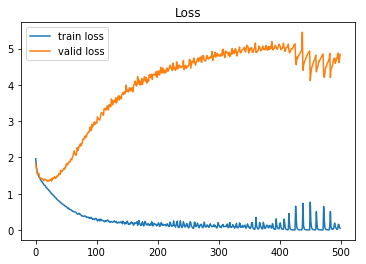

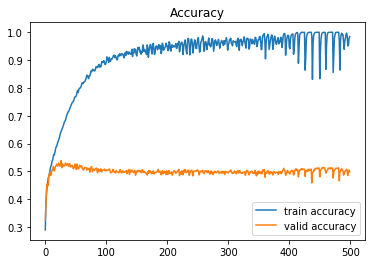

In [9]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 2. 將 Optimizer 換成 SGD

In [10]:
model2 = build_mlp()
optimizer = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
"""
Set epochs
"""
model2.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 162us/step - loss: 2.2816 - acc: 0.1553 - val_loss: 2.2326 - val_acc: 0.2185
Epoch 2/100
50000/50000 [==============================] - 8s 152us/step - loss: 2.2075 - acc: 0.2361 - val_loss: 2.1794 - val_acc: 0.2539
Epoch 3/100
50000/50000 [==============================] - 8s 152us/step - loss: 2.1586 - acc: 0.2594 - val_loss: 2.1342 - val_acc: 0.2725
Epoch 4/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.1165 - acc: 0.2730 - val_loss: 2.0949 - val_acc: 0.2835
Epoch 5/100
50000/50000 [==============================] - 7s 148us/step - loss: 2.0794 - acc: 0.2845 - val_loss: 2.0605 - val_acc: 0.2950
Epoch 6/100
50000/50000 [==============================] - 7s 147us/step - loss: 2.0469 - acc: 0.2934 - val_loss: 2.0303 - val_acc: 0.3037
Epoch 7/100
50000/50000 [==============================] - 7s 149us/step - loss: 2.0183 - acc: 0.3021 - val_loss: 2.

50000/50000 [==============================] - 9s 172us/step - loss: 1.6671 - acc: 0.4197 - val_loss: 1.6758 - val_acc: 0.4173
Epoch 59/100
50000/50000 [==============================] - 8s 169us/step - loss: 1.6641 - acc: 0.4214 - val_loss: 1.6713 - val_acc: 0.4204
Epoch 60/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.6612 - acc: 0.4224 - val_loss: 1.6685 - val_acc: 0.4153
Epoch 61/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.6580 - acc: 0.4234 - val_loss: 1.6640 - val_acc: 0.4193
Epoch 62/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.6551 - acc: 0.4251 - val_loss: 1.6611 - val_acc: 0.4223
Epoch 63/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.6520 - acc: 0.4255 - val_loss: 1.6615 - val_acc: 0.4186
Epoch 64/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.6490 - acc: 0.4261 - val_loss: 1.6568 - val_acc: 0.4241
Epoch 65/100
50000/50000 [=======

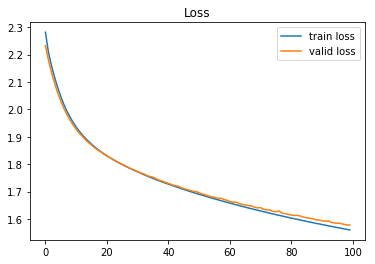

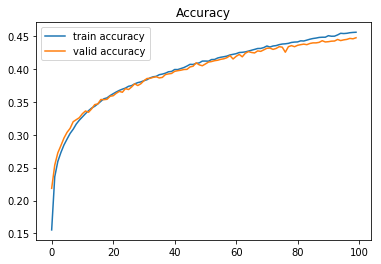

In [12]:
import matplotlib.pyplot as plt
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_acc = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()